In [9]:
# Import necessary libraries
import torch                # Import the main PyTorch library
import torch.nn as nn       # Import the neural network module of PyTorch
import torch.optim as optim # Import the optimization module for training the model
from torchvision import datasets, transforms  # Import the datasets and transformations from torchvision
from torch.utils.data import DataLoader  # Import DataLoader to handle data loading

# Data preparation
transform = transforms.Compose([transforms.ToTensor()])  # Create a transformation to convert images to tensors
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)  # Load training data for MNIST, apply the transformation
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)  # Load test data for MNIST, apply the transformation

# DataLoader to load data in batches for training and testing
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)  # Create a DataLoader for training data, with batch size 64 and shuffle enabled
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)  # Create a DataLoader for test data, with batch size 64 and shuffle disabled

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()  # Initialize the base class
        self.fc1 = nn.Linear(28 * 28, 128)  # Fully connected layer from 28x28 (784 pixels) to 128 neurons
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(128, 10)       # Fully connected layer from 128 neurons to 10 outputs (one for each class)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image from 28x28 to 784 pixels (vector)
        x = self.fc1(x)          # Pass through the first fully connected layer
        x = self.relu(x)         # Apply ReLU activation
        x = self.fc2(x)          # Pass through the second fully connected layer (output layer)
        return x  # Return the output of the model

# Initialize the model
model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

# Training the model
for epoch in range(5):  # Loop over the training dataset for 5 epochs
    total_loss = 0  # Initialize the total loss for this epoch
    for images, labels in train_loader:  # Loop over batches of images and labels from the training data
        optimizer.zero_grad()  # Reset the gradients from the previous iteration
        outputs = model(images)  # Get the model's output for the input images
        loss = criterion(outputs, labels)  # Calculate the loss between predicted outputs and actual labels
        loss.backward()  # Backpropagate the loss to compute gradients
        optimizer.step()  # Update the model weights using the optimizer
        total_loss += loss.item()  # Accumulate the loss for this epoch
    # Print the average loss for this epoch
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

# Testing the model
correct = 0  # Initialize the counter for correct predictions
total = 0  # Initialize the counter for total number of predictions
with torch.no_grad():  # Disable gradient computation for testing (this saves memory and computation)
    for images, labels in test_loader:  # Loop over batches of images and labels from the test data
        outputs = model(images)  # Get the model's output for the input images
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability (the predicted class)
        total += labels.size(0)  # Increase the total number of predictions
        correct += (predicted == labels).sum().item()  # Increase the number of correct predictions

# Print the accuracy of the model on the test dataset
print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch 1, Loss: 0.3370365788226824
Epoch 2, Loss: 0.15361766518155204
Epoch 3, Loss: 0.10748855500960591
Epoch 4, Loss: 0.08265391180315601
Epoch 5, Loss: 0.06603394946141014
Test Accuracy: 97.36%


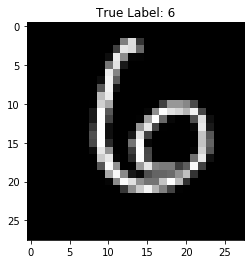

Predicted Label: 6


In [10]:
# Import necessary libraries
import torch  # Import PyTorch library
import matplotlib.pyplot as plt  # Import Matplotlib for plotting images

# Define the device for using GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # If a GPU is available, use it; otherwise, use CPU

# Get index 100 from the test data
index = 100  # Define the index to fetch the 100th image from the test dataset
image, label = test_data[index]  # Get the image and its true label at the given index from the test data

# Display the image
plt.imshow(image.squeeze(), cmap="gray")  # Squeeze the image tensor to remove any extra dimensions and display it in grayscale
plt.title(f"True Label: {label}")  # Set the title of the image plot to show the true label of the image
plt.show()  # Display the image plot

# Send the model to the appropriate device (GPU or CPU)
model.to(device)  # Move the model to the device (GPU or CPU) that was defined earlier

# Make a prediction with the model
model.eval()  # Change the model to evaluation mode (turn off dropout and batch normalization)
with torch.no_grad():  # Disable gradient computation for inference (saves memory and computation)
    output = model(image.unsqueeze(0).to(device))  # Pass the image to the model (add a batch dimension using unsqueeze and move to the device)
    _, predicted = torch.max(output, 1)  # Get the predicted class by finding the index of the maximum value in the output tensor

# Print the predicted label
print(f"Predicted Label: {predicted.item()}")  # Print the predicted label as a scalar value
